<a href="https://colab.research.google.com/github/endurance28/Geoengineering-Model-Intercomparison-Project-GeoMIP-/blob/main/GeoMIP_IPSL_CM6A_Surface_Temperature_and_Precipitation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Files from GDrive

In [ ]:
!pip install netCDF4
!pip install ipywidgets

from google.colab import drive
import netCDF4 as nc

# Mount Google Drive
drive.mount('/content/drive')

file1_path = "/content/drive/MyDrive/GeoMIP Data Final/pr_Amon_IPSL-CM6A-LR_G1_r1i1p1f1_gr_185001-194912.nc"
file2_path = "/content/drive/MyDrive/GeoMIP Data Final/pr_Amon_IPSL-CM6A-LR_piControl_r1i1p1f1_gr_185001-304912.nc"
file3_path = "/content/drive/MyDrive/GeoMIP Data Final/ts_Amon_IPSL-CM6A-LR_G1_r1i1p1f1_gr_185001-194912.nc"
file4_path = "/content/drive/MyDrive/GeoMIP Data Final/ts_Amon_IPSL-CM6A-LR_piControl_r1i1p1f1_gr_185001-304912.nc"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.9 MB/s eta 0:00:00
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Defining Datasets, Latitude, Longitude and 2 Time Series

In [ ]:
import numpy as np

# Open the netCDF file
ds1 = nc.Dataset(file1_path)
ds2 = nc.Dataset(file2_path)
ds3 = nc.Dataset(file3_path)
ds4 = nc.Dataset(file4_path)

# Access the variable
arr1 = ds1.variables['lat']
arr2 = ds1.variables['lon']
arr3 = ds1.variables['time']
arr4 = ds2.variables['time']
#  Defining longitude and latitude series, and the 2 time series (first time_array is smaller)
lat_array = arr1[:]
lon_array = arr2[:]
time_array1 = arr3[:]
time_array2 = arr4[:]



Defining the Gaussian Weightage Function (and Array)

In [ ]:
import numpy as np
def gw(lat_in_degrees):
  angle1_in_degrees = lat_in_degrees
  angle2_in_degrees = lat_in_degrees + (180/142)
  angle1_in_radians = np.radians(angle1_in_degrees)
  angle2_in_radians = np.radians(angle2_in_degrees)

  gaussian_weights = (2.5/720)* abs(np.sin(angle2_in_radians) - np.sin(angle1_in_radians))

  return gaussian_weights

gw_array = gw(lat_array[0:142])

gw_super = np.tile(gw_array,144)

#print(len(gw_array))
#print(gw_array)
#print(sum(gw_array)*144)

#Plots for G1 Precipitation

##Monthly Data (1200 points)

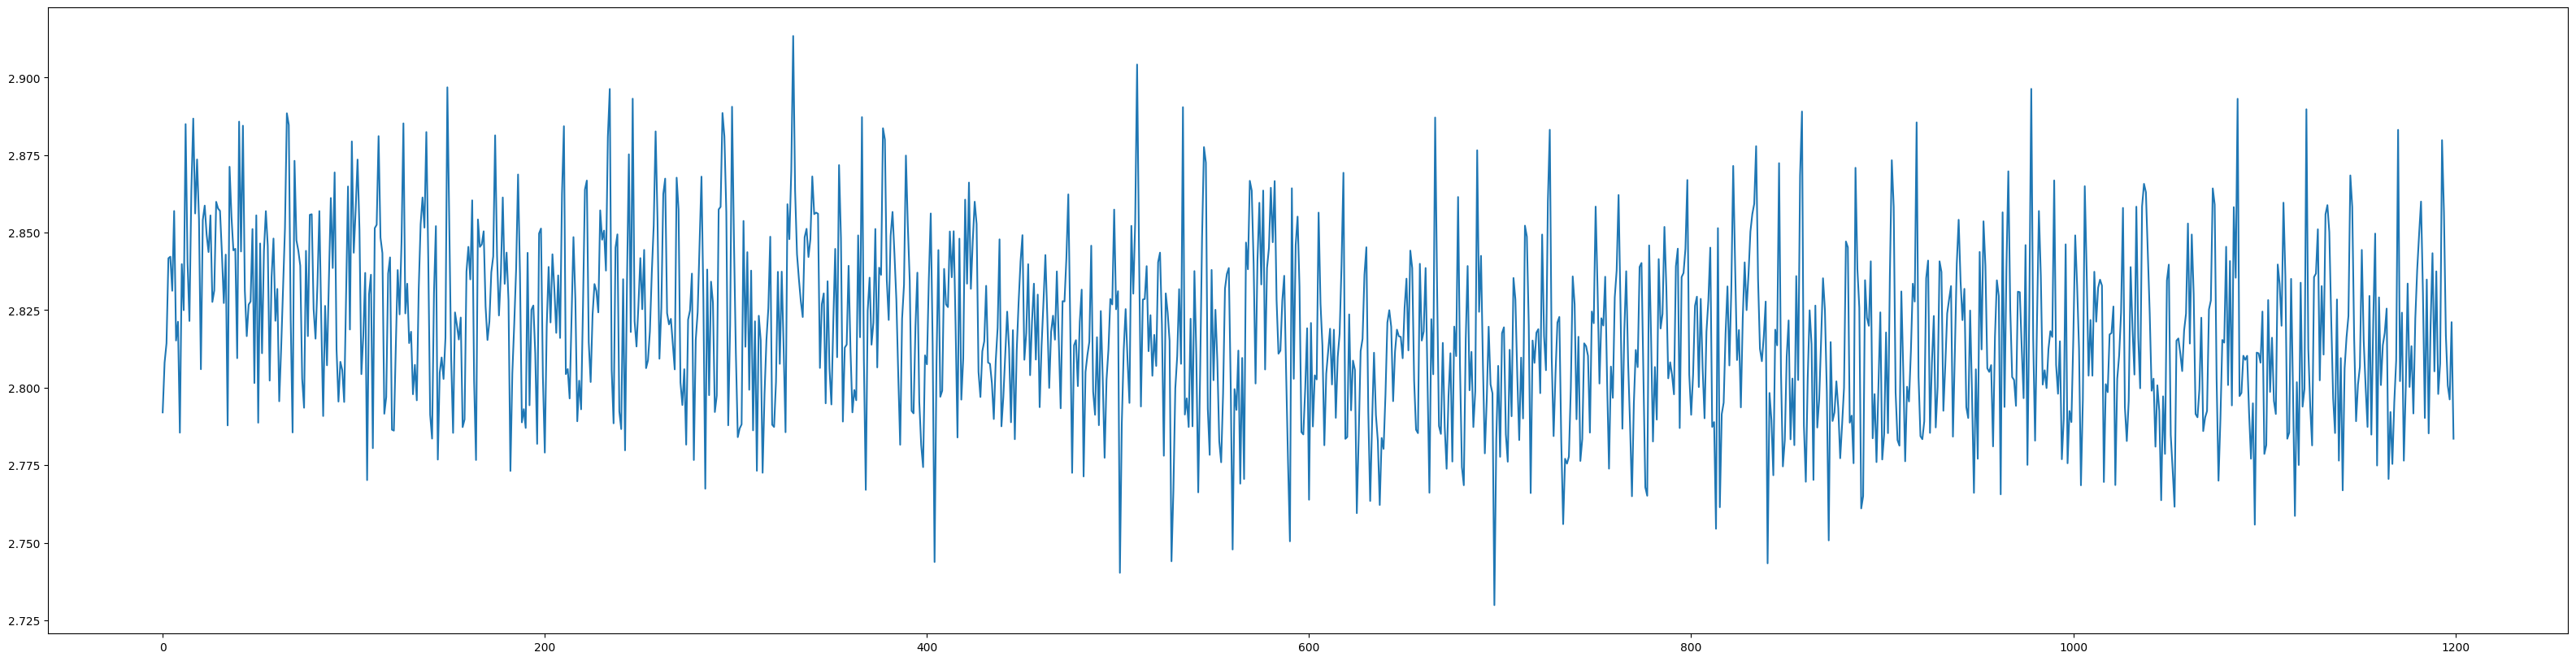

In [ ]:
import matplotlib.pyplot as plt

precip1 = ds1['pr']
rain_data = precip1[:,0:142,:]

rain_time_series = np.zeros(1200)
for t in range(0,1200):
  rainmatrix = (rain_data[t,:,:].T).flatten()
  rain_time_series[t] = sum(rainmatrix*gw_super)*86400

x = np.arange(0,1200,1)
plt.figure(figsize=(40,10))
plt.plot(x,rain_time_series)


##Annual Data (100 years)

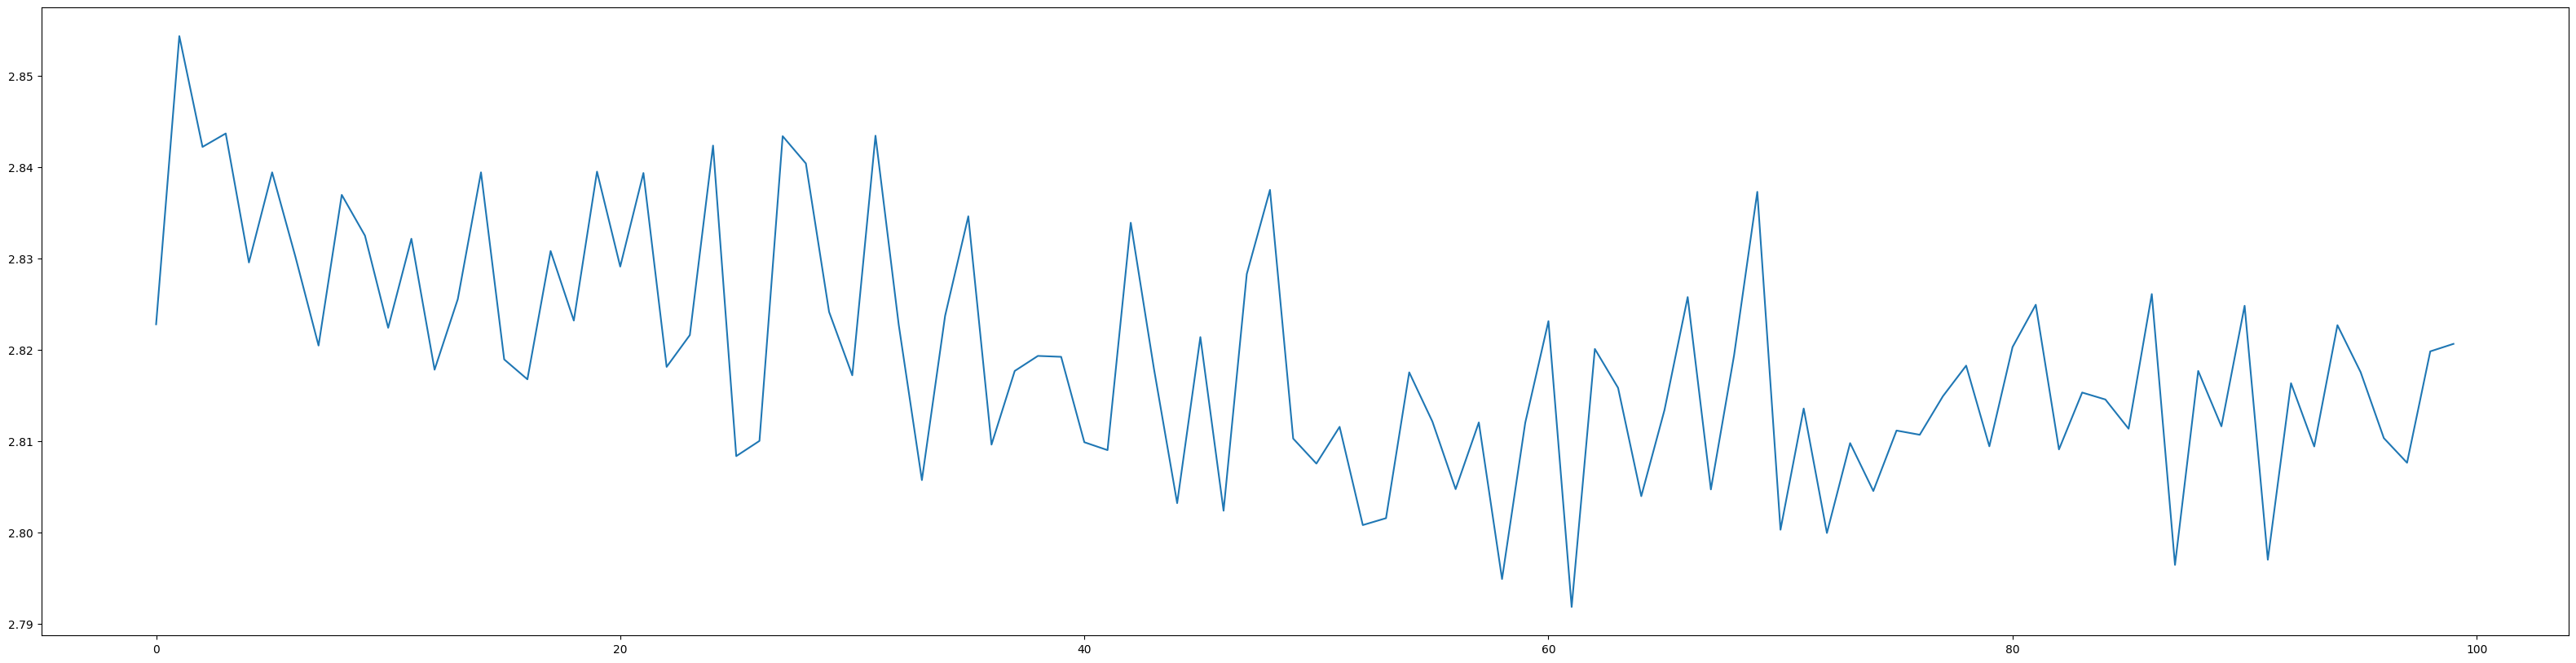

In [ ]:
reshaped_array = rain_time_series.reshape(-1, 12)
weights = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
annual_rain = np.average(reshaped_array, axis=1, weights=weights)

plt.figure(figsize=(40,10))
x1 = np.arange(100)
plt.plot(x1,annual_rain)


##5  Year Averages

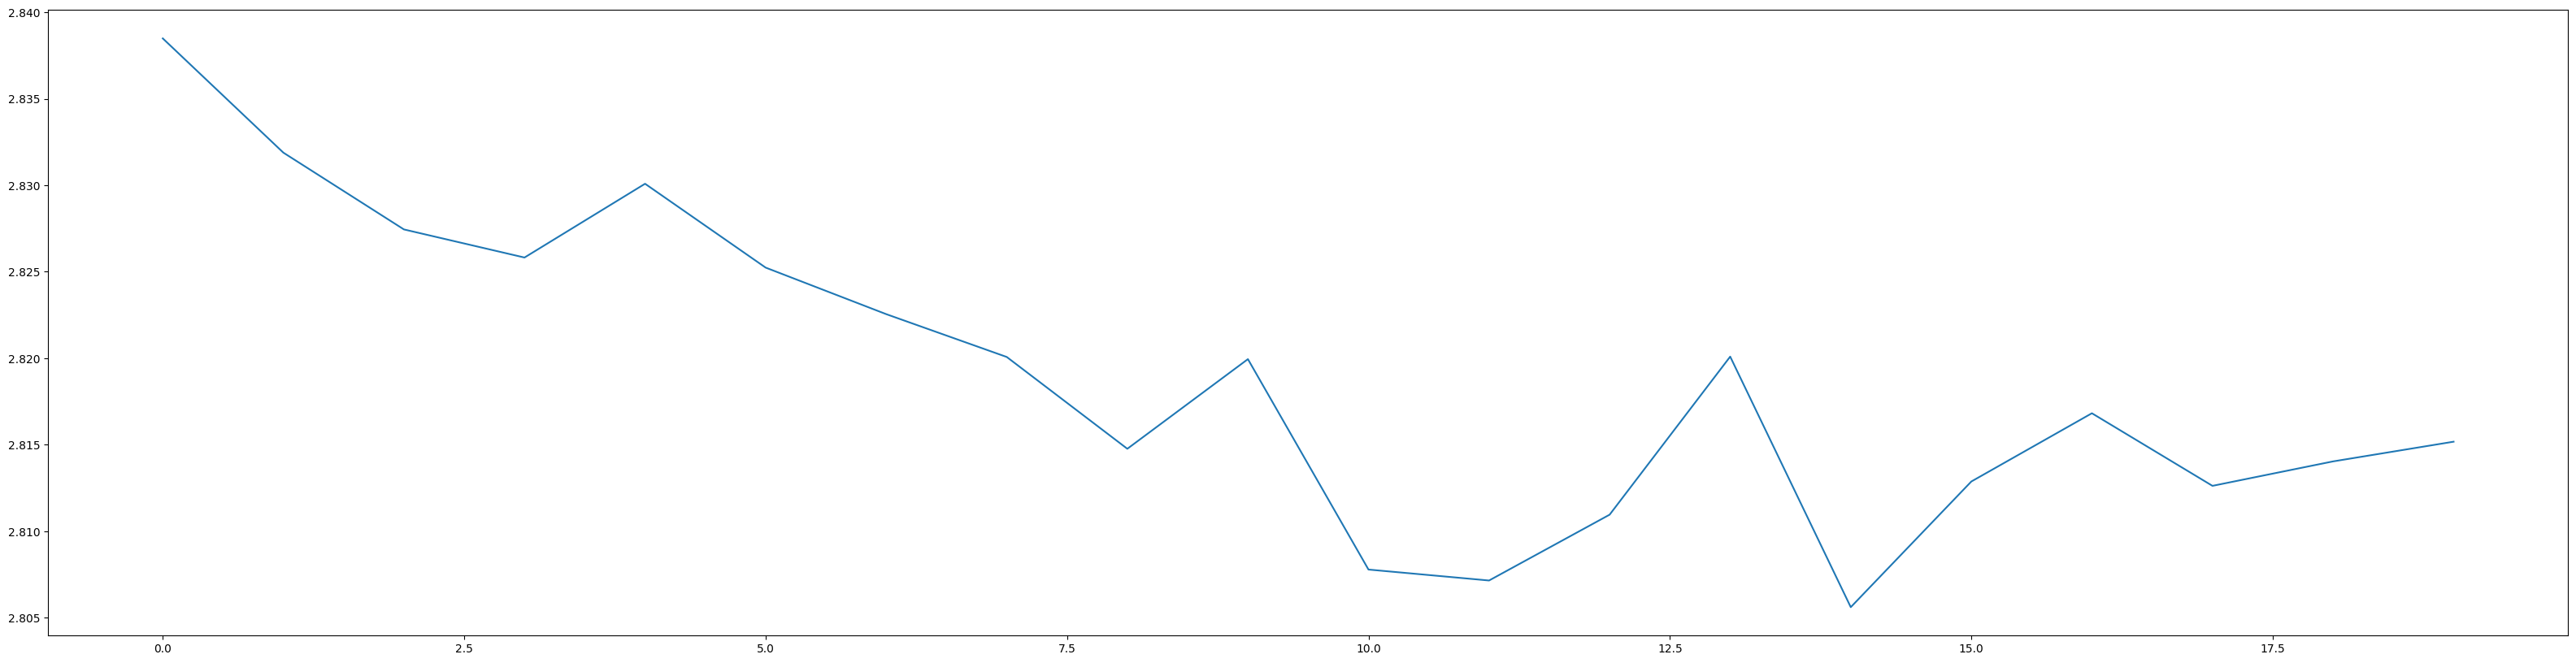

In [ ]:
reshaped_array2 = annual_rain.reshape(-1, 5)
five_yr_averages = np.mean(reshaped_array2, axis=1)

plt.figure(figsize=(40,10))
x1 = np.arange(20)
plt.plot(x1,five_yr_averages)

# Plots for PiControl Precipitation

## Monthly Data (14400 Data Points)

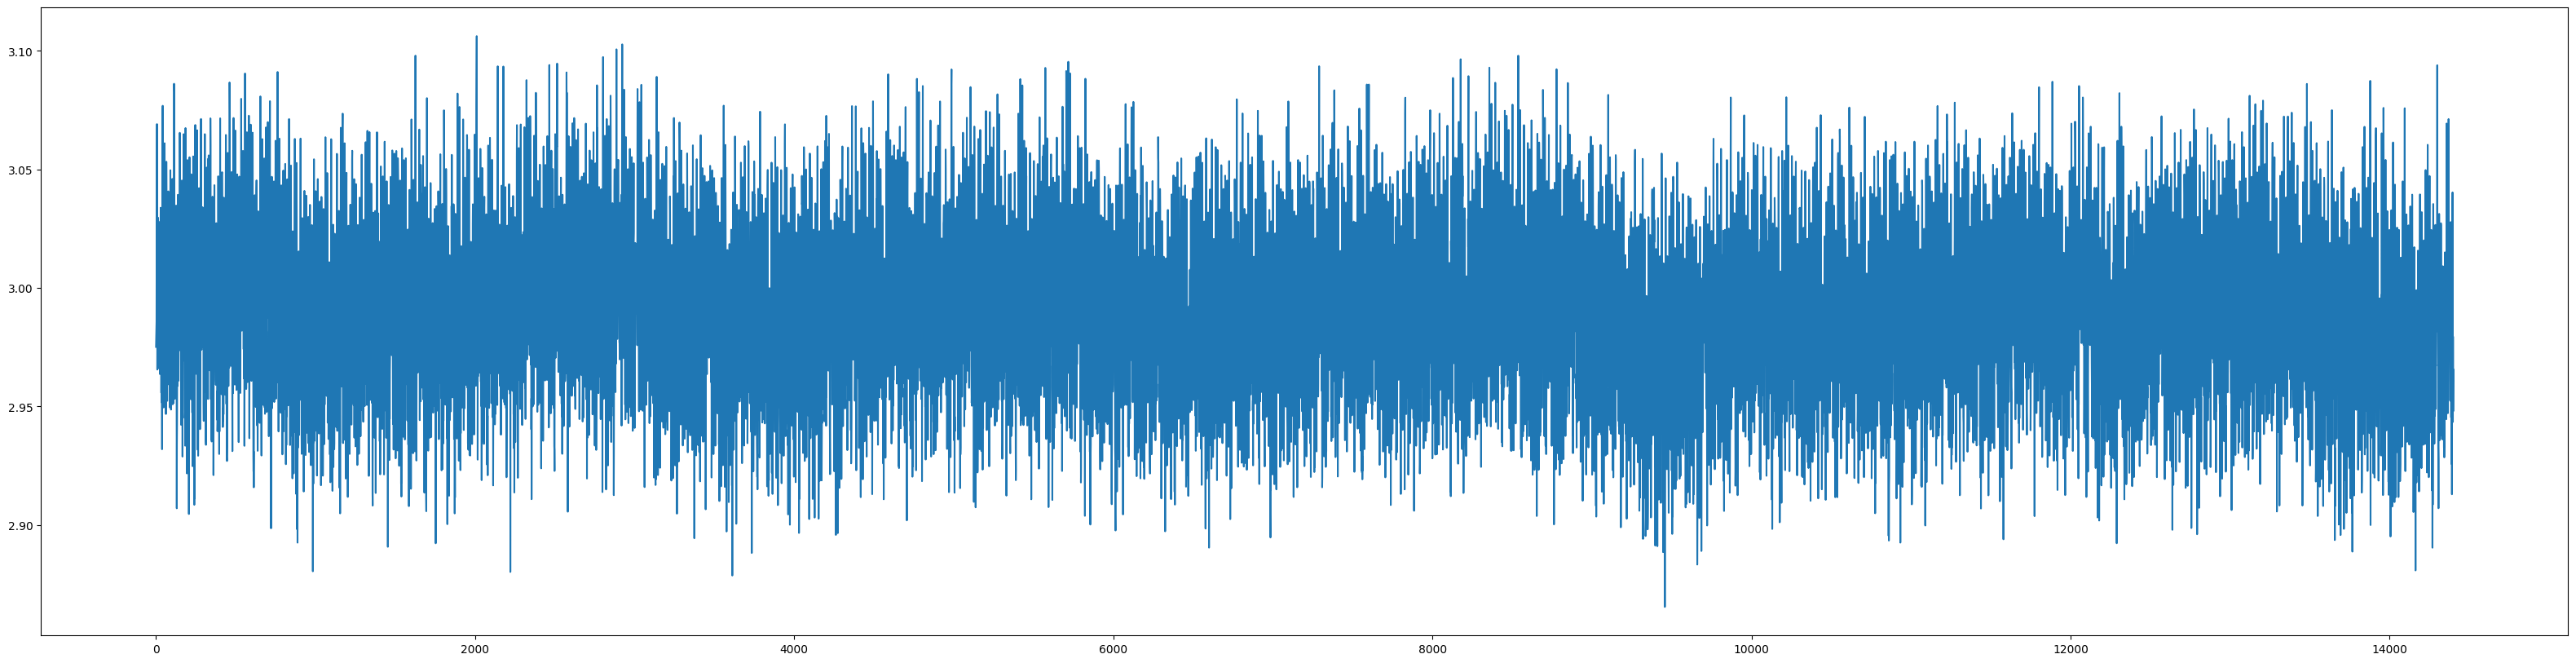

In [ ]:
import matplotlib.pyplot as plt

precip2 = ds2['pr']
rain_data2 = precip2[:,0:142,:]

rain_time_series2 = np.zeros(14400)
for t in range(0,14400):
  rainmatrix2 = (rain_data2[t,:,:].T).flatten()
  rain_time_series2[t] = sum(rainmatrix2*gw_super)*86400

x = np.arange(0,14400,1)
plt.figure(figsize=(40,10))
plt.plot(x,rain_time_series2)


## Annual Data (1200 Years)

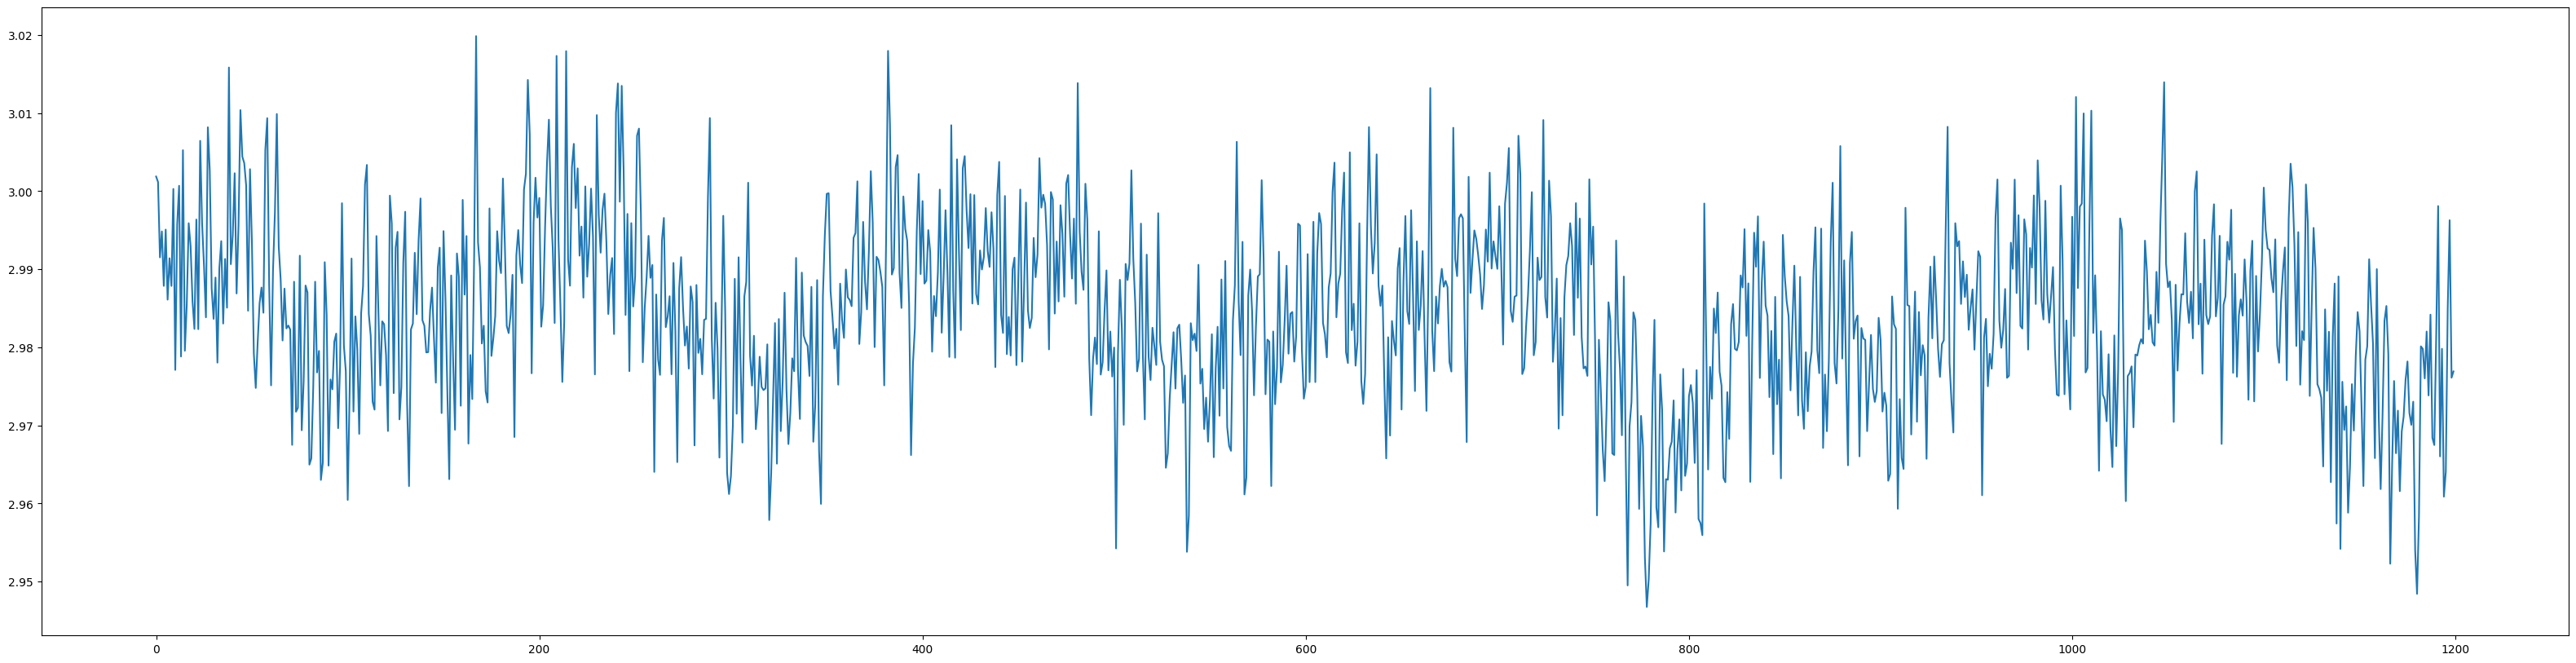

In [ ]:
annual_array = rain_time_series2.reshape(-1, 12)
weights = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
annual_rain2 = np.average(annual_array, axis=1, weights=weights)

plt.figure(figsize=(40,10))
x1 = np.arange(1200)
plt.plot(x1,annual_rain2)


## 5 Year Averages (240 Datapoints)

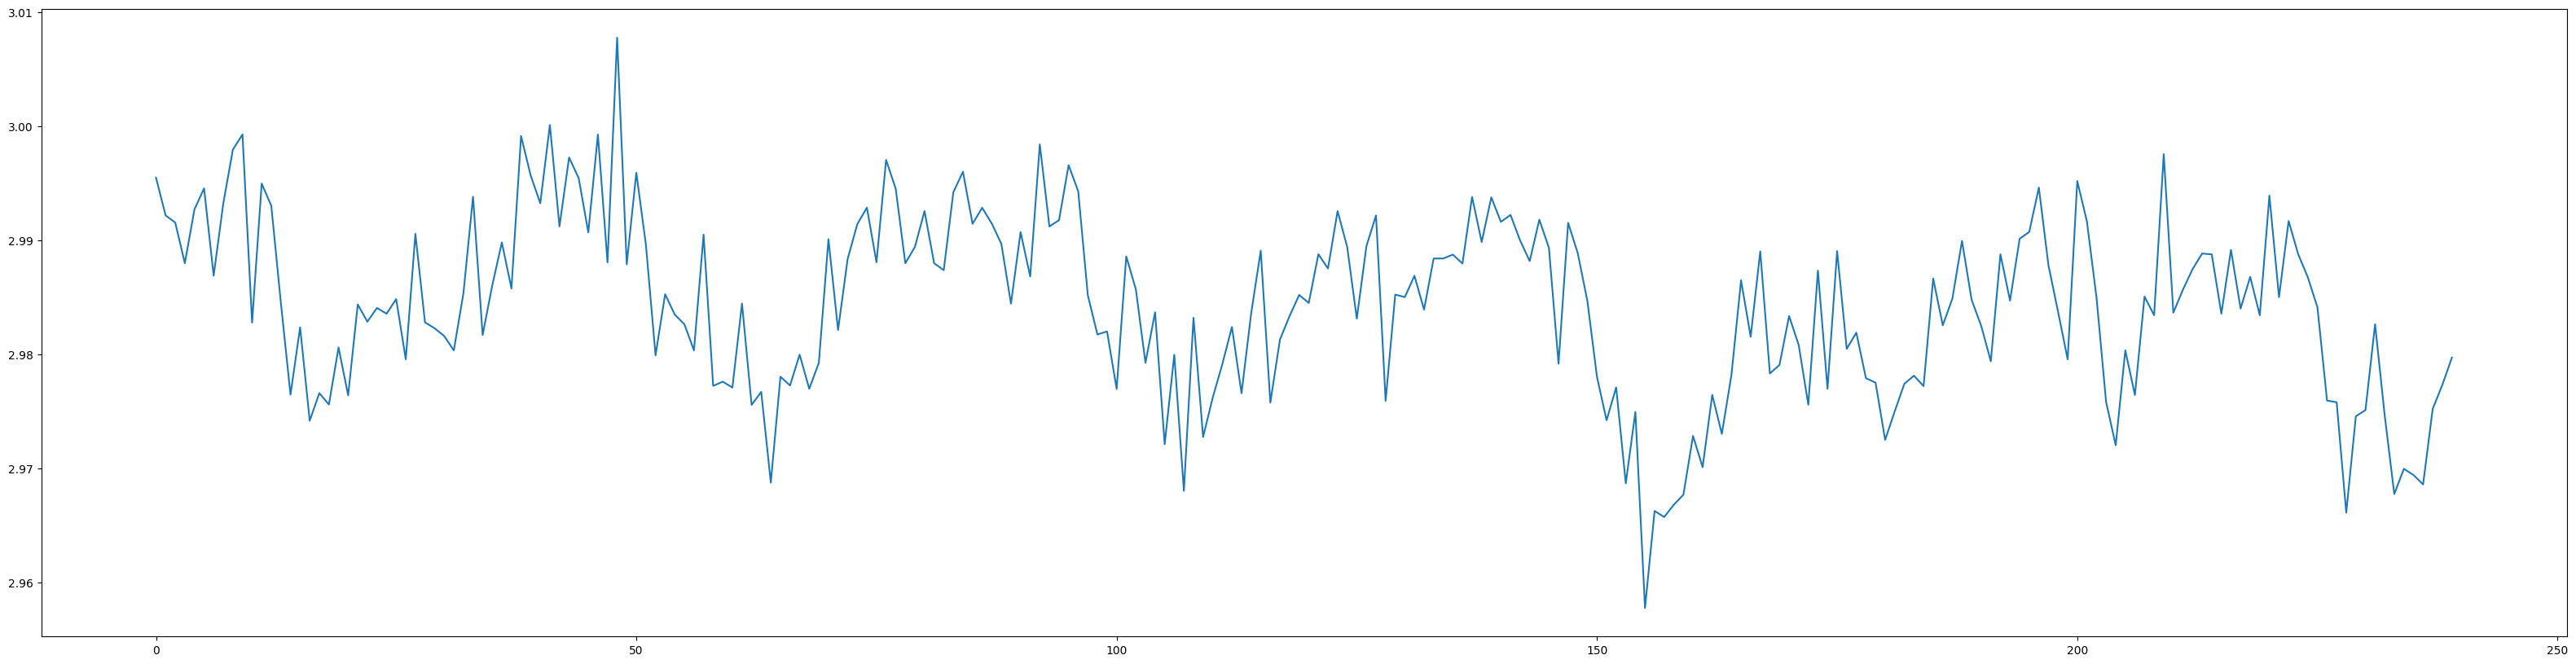

In [ ]:
reshaped_array2 = annual_rain2.reshape(-1, 5)
five_yr_averages2 = np.mean(reshaped_array2, axis=1)

plt.figure(figsize=(40,10))
x1 = np.arange(240)
plt.plot(x1,five_yr_averages2)

# Plots for G1 Surface Temperature

# Monthly Data (1200 Datapoints)

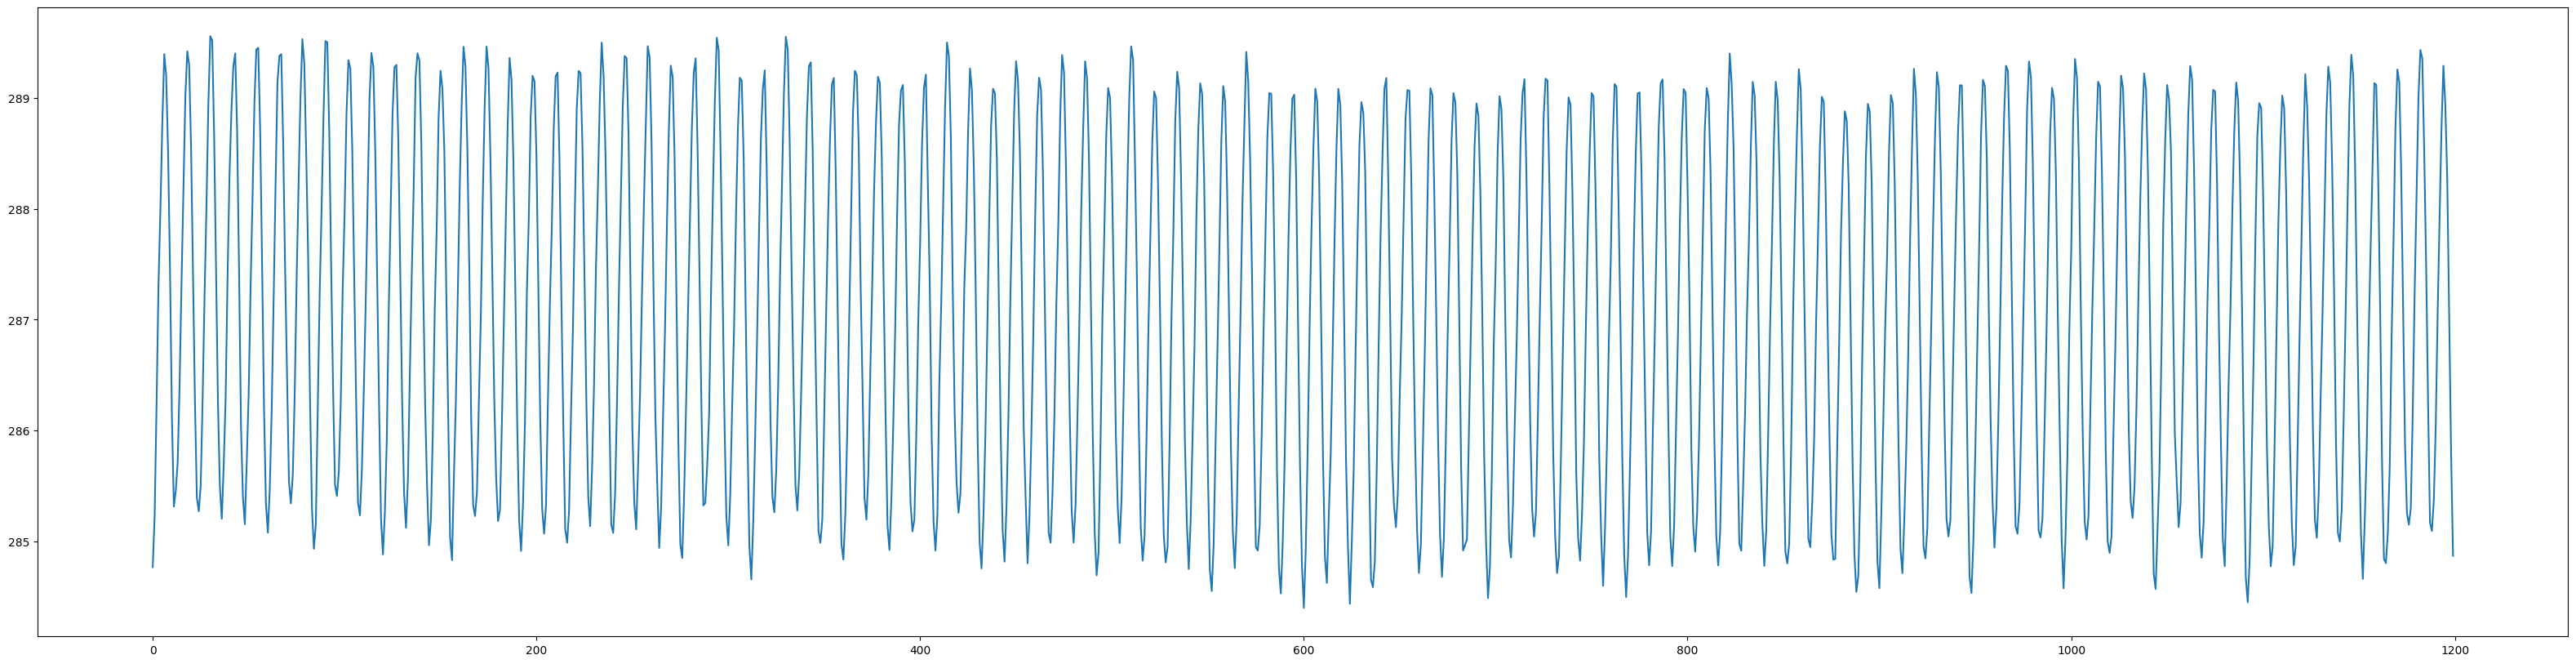

In [ ]:
import matplotlib.pyplot as plt

ts3 = ds3['ts']
ts_data3 = ts3[:,0:142,:]

temp_time_series1 = np.zeros(1200)
for t in range(0,1200):
  tempmatrix = (ts_data3[t,:,:].T).flatten()
  temp_time_series1[t] = sum(tempmatrix*gw_super)

x = np.arange(0,1200,1)
plt.figure(figsize=(40,10))
plt.plot(x,temp_time_series1)


## Annual Data (100 Years)

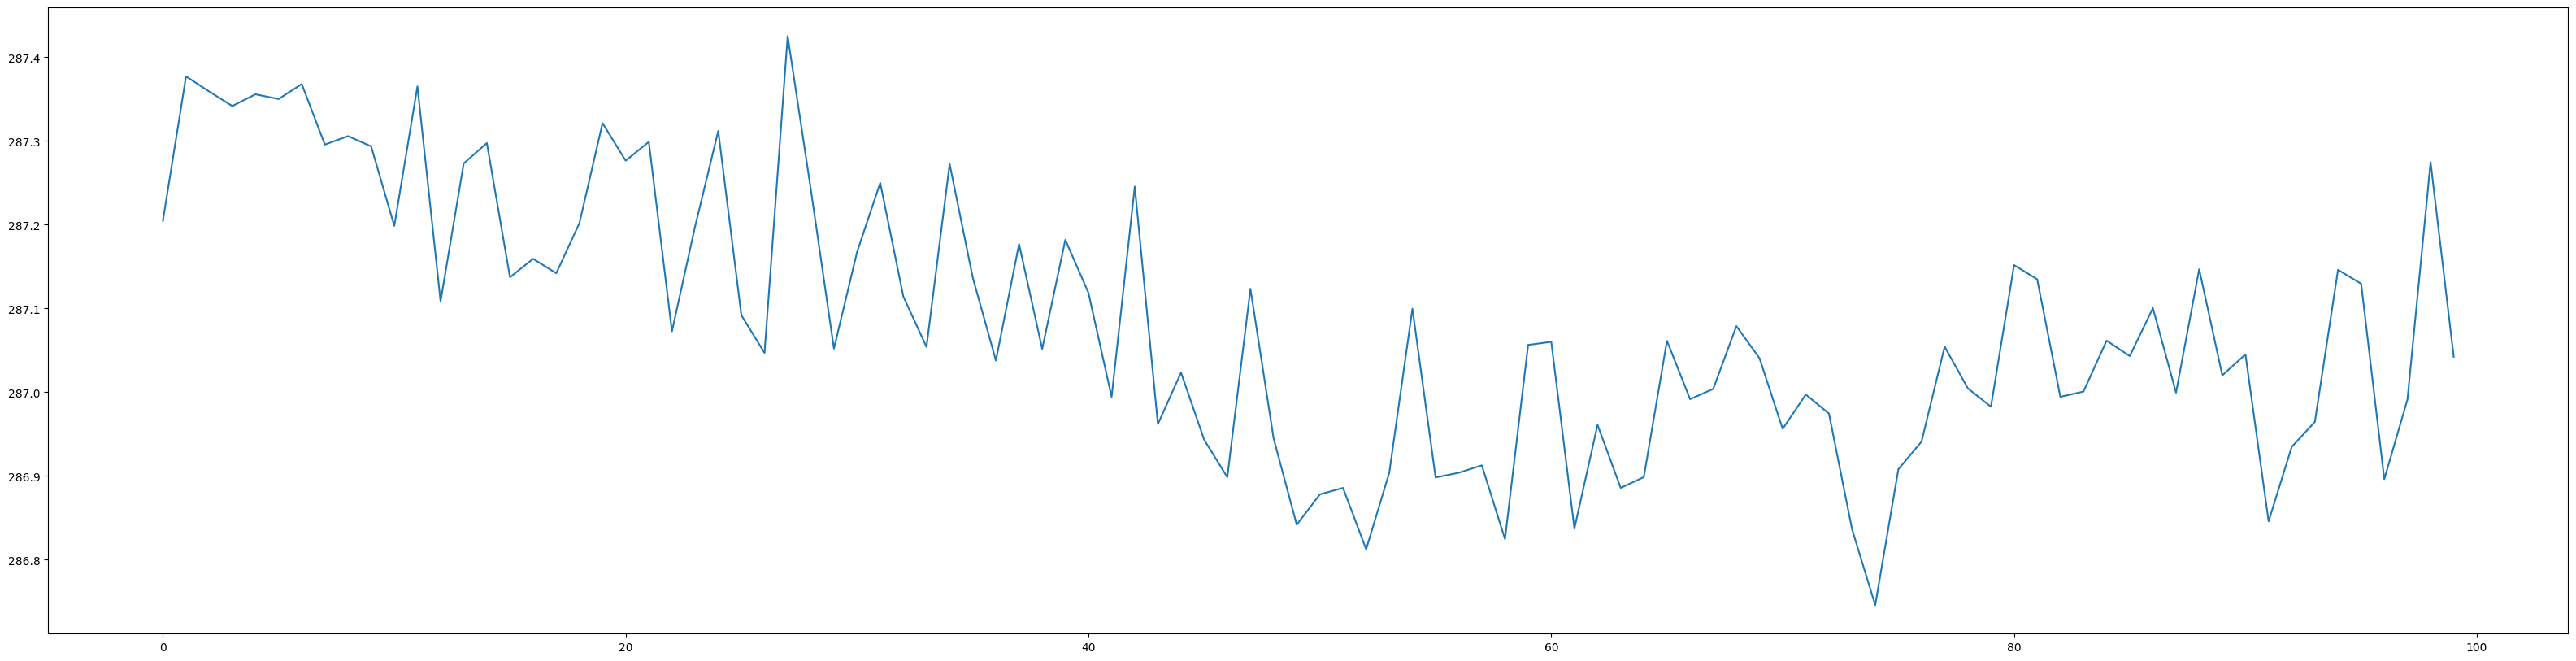

In [ ]:
reshaped_array = temp_time_series1.reshape(-1, 12)
weights = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
annual_temp = np.average(reshaped_array, axis=1, weights=weights)

plt.figure(figsize=(40,10))
x1 = np.arange(100)
plt.plot(x1,annual_temp)

## 5 Year Averages

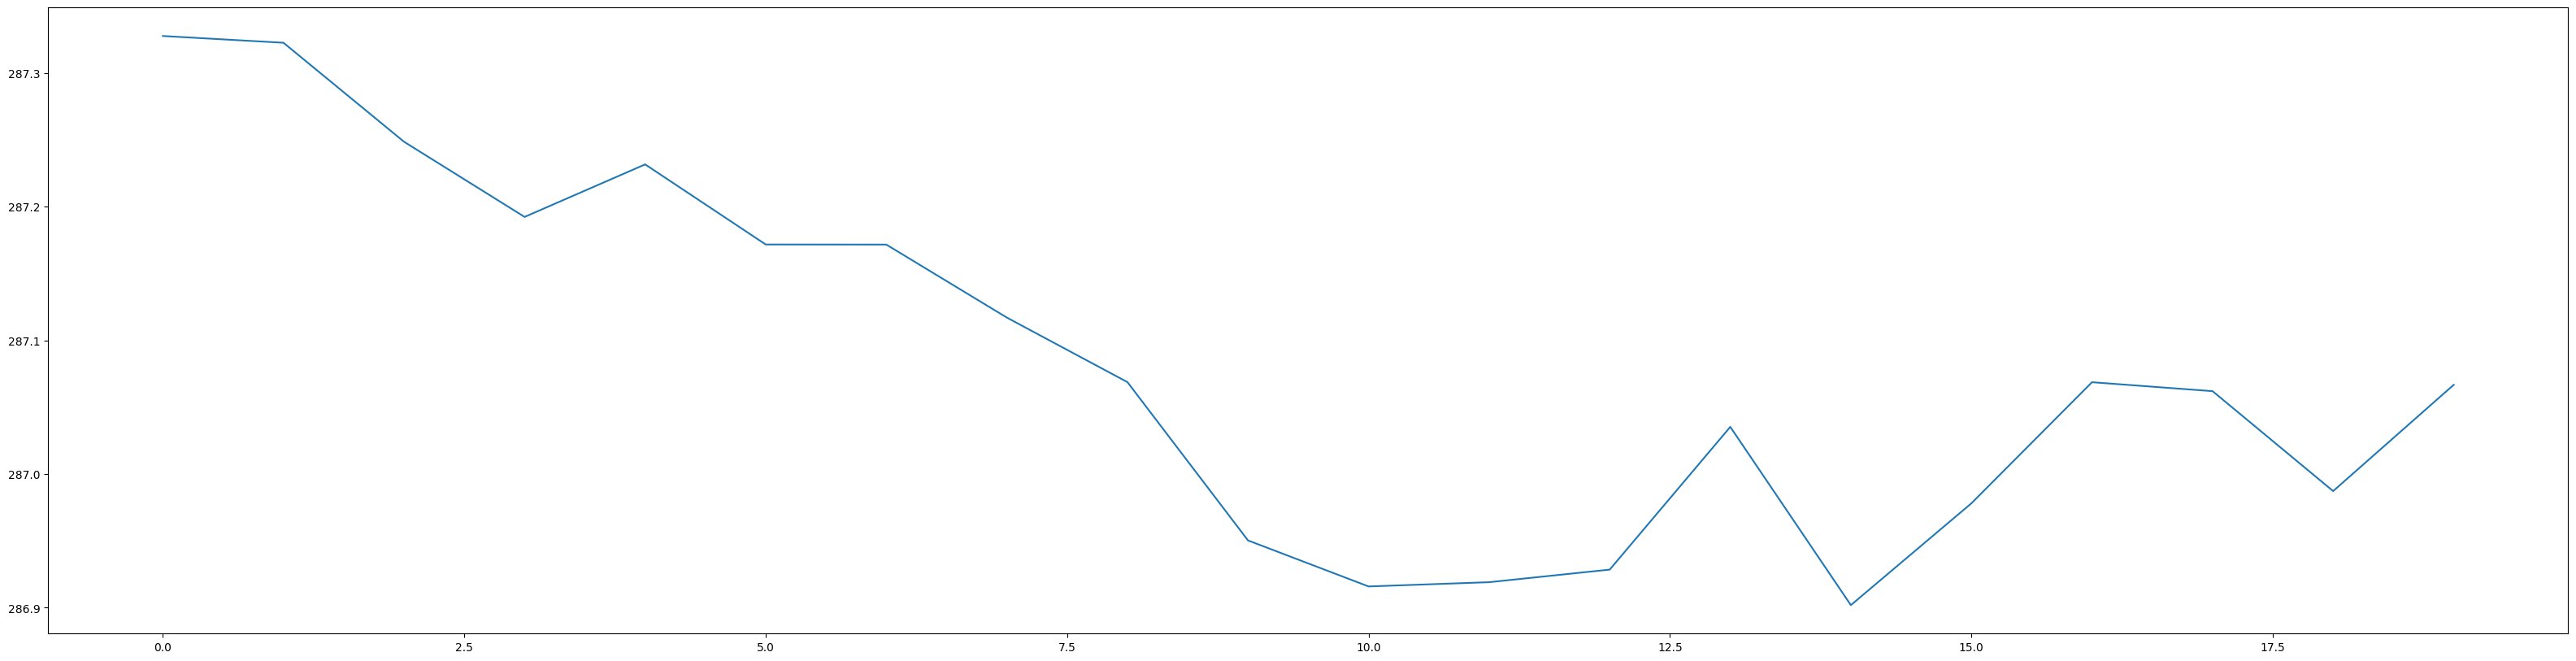

In [ ]:
reshaped_array = annual_temp.reshape(-1, 5)
five_yr_averages = np.mean(reshaped_array, axis=1)

plt.figure(figsize=(40,10))
x1 = np.arange(20)
plt.plot(x1,five_yr_averages)

# Plot for PiControl Temperature

## Monthly Data (14400 Datapoints)

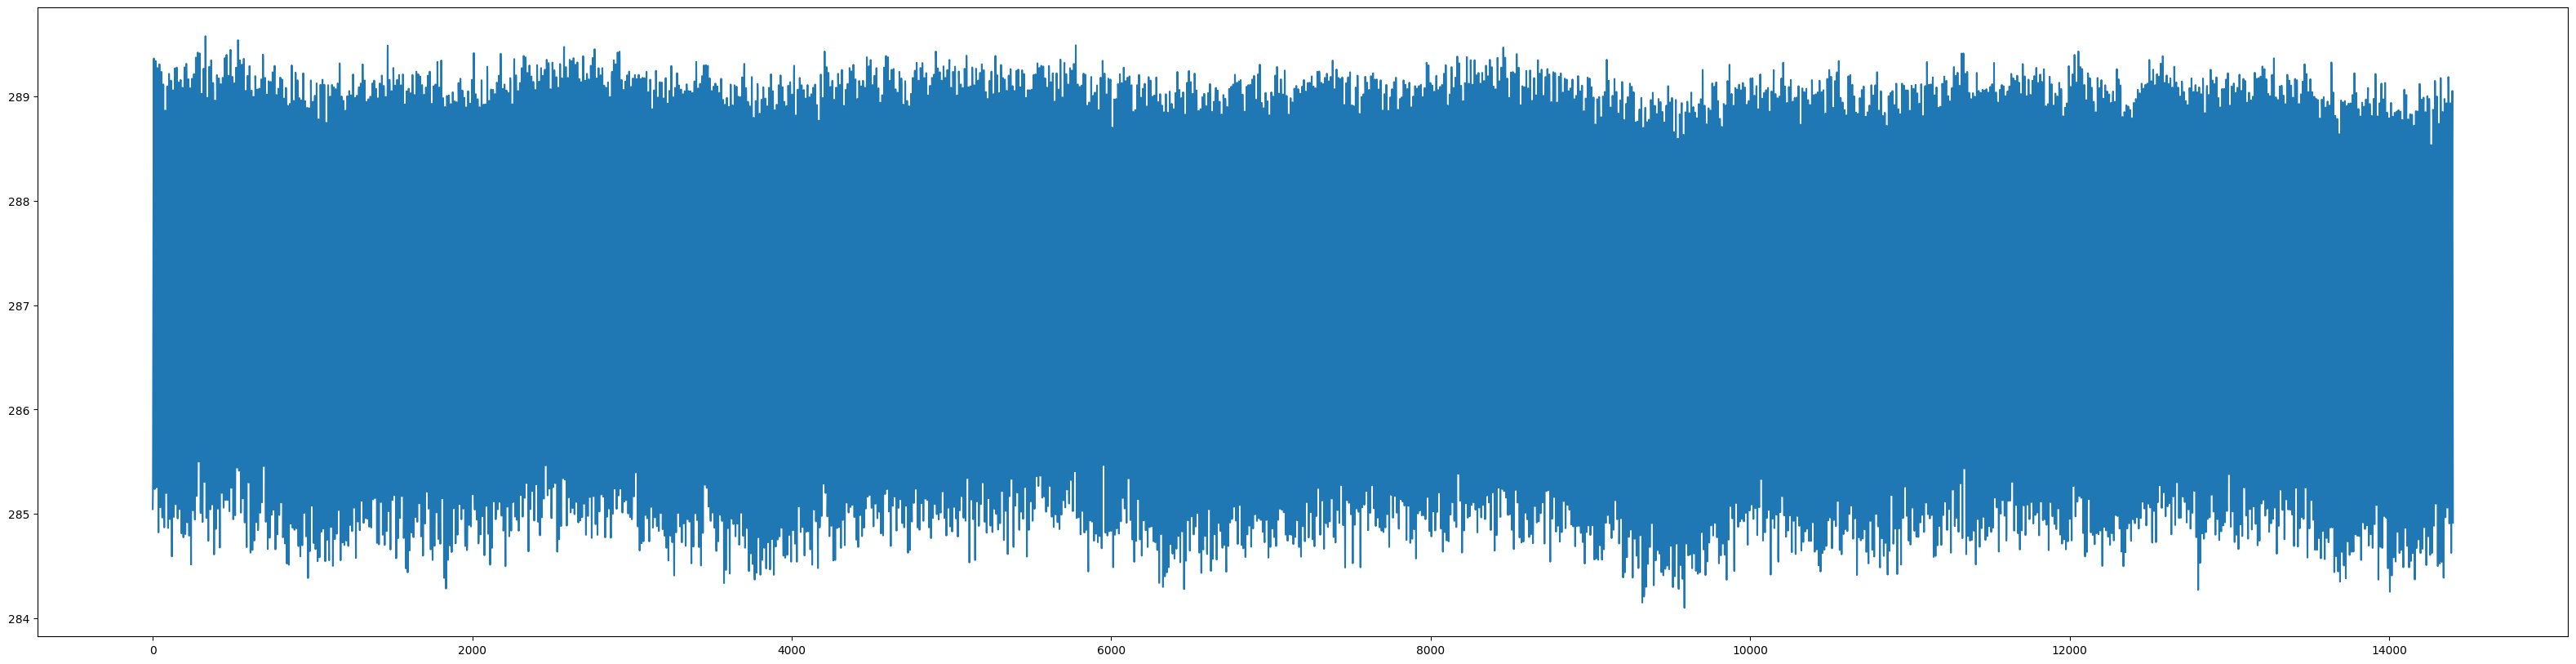

In [ ]:
import matplotlib.pyplot as plt

ts4 = ds4['ts']
ts_data4 = ts4[:,0:142,:]

temp_time_series2 = np.zeros(14400)
for t in range(0,14400):
  tempmatrix2 = (ts_data4[t,:,:].T).flatten()
  temp_time_series2[t] = sum(tempmatrix2*gw_super)

x = np.arange(0,14400,1)
plt.figure(figsize=(40,10))
plt.plot(x,temp_time_series2)


## Annual Data (1200 Years)

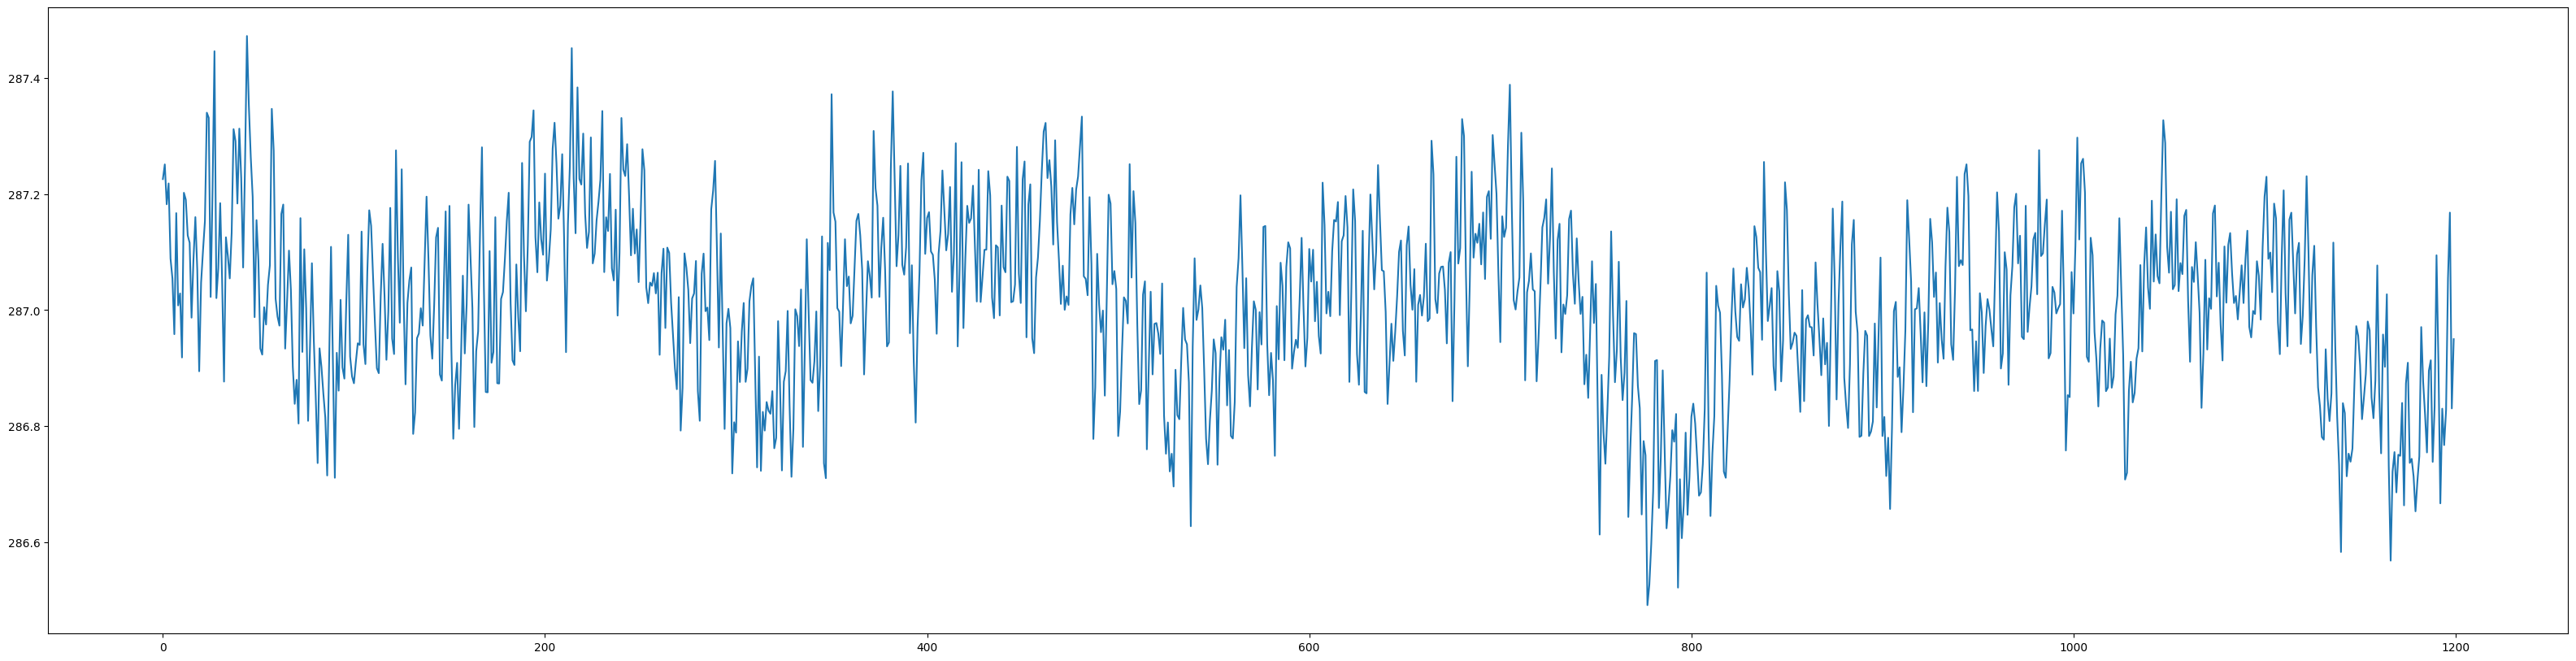

In [ ]:
reshaped_array2 = temp_time_series2.reshape(-1, 12)
weights = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
annual_temp2 = np.average(reshaped_array2, axis=1, weights=weights)

plt.figure(figsize=(40,10))
x1 = np.arange(1200)
plt.plot(x1,annual_temp2)

## 5 Year Averages

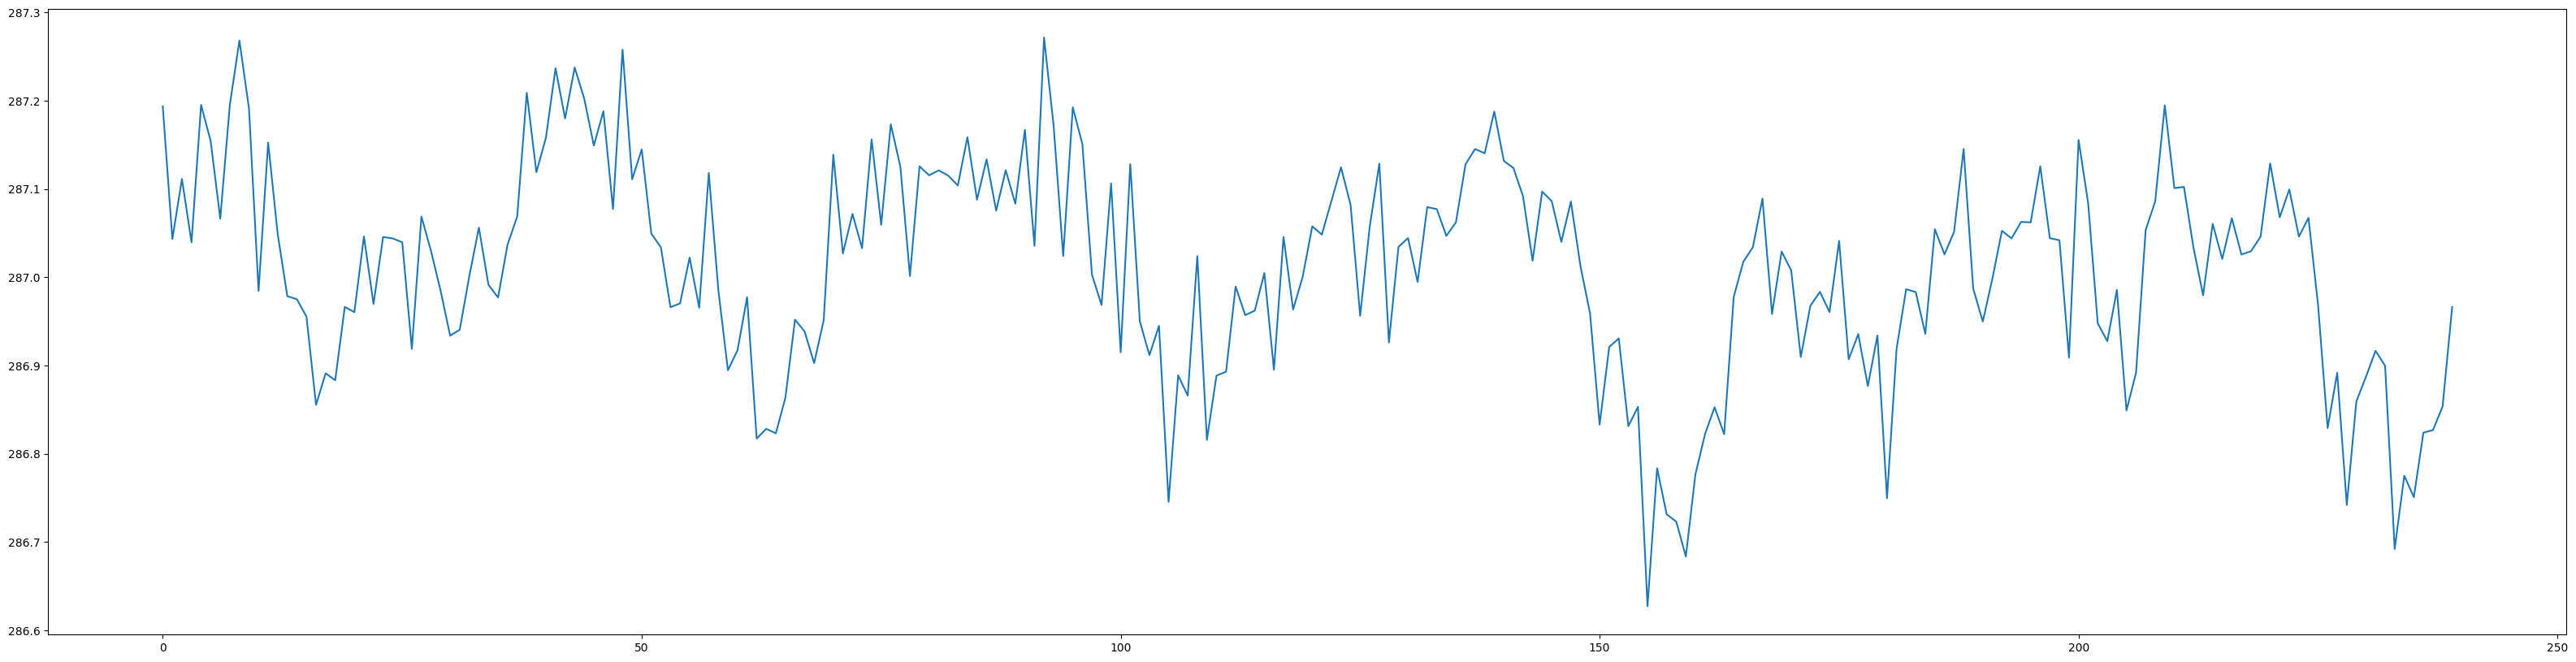

In [ ]:
reshaped_array3 = annual_temp2.reshape(-1, 5)
five_yr_averages2 = np.mean(reshaped_array3, axis=1)

plt.figure(figsize=(40,10))
x1 = np.arange(240)
plt.plot(x1,five_yr_averages2)

# Scrollable Plot

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Sample data and calculation
ts4 = ds4['ts']
ts_data4 = ts4[:, 0:142, :]

gw_super = np.tile(gw_array, 144)
temp_time_series2 = np.zeros(14400)

for t in range(0, 14400):
    tempmatrix2 = (ts_data4[t, :, :].T).flatten()
    temp_time_series2[t] = sum(tempmatrix2 * gw_super)

x = np.arange(0, 14400, 1)

# Create interactive scrollbar widget
def update_plot(start, end):
    plt.figure(figsize=(40, 10))
    plt.plot(x[start:end], temp_time_series2[start:end])
    plt.show()

start_slider = widgets.IntSlider(value=0, min=0, max=14399, step=1, description='Start Point:')
end_slider = widgets.IntSlider(value=100, min=0, max=14399, step=1, description='End Point:')
widgets.interactive(update_plot, start=start_slider, end=end_slider)


interactive(children=(IntSlider(value=0, description='Start Point:', max=14399), IntSlider(value=100, descript…